# Lab06: Time Series in Pandas

## Temperature Time Series

I would like you to download the LAN-WX.csv file into your working directory for this notebook and use it for today's exercise.  Provided the page is up (it wasn't earlier), you can find documentation about each of the columns in the CSV file here: 
https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

For the purposes of our exercise, we are most interested in these columns:
* DATE
* TMIN the minimum daily temperature
* TMAX the maximum daily temperature

I would like you to do the following:
* As with today's lecture, convert the DATE column into a temporal-based index for the data frame.
* Using this and the methods from today, I'd like you to do the following:
    1. Display a table that shows the maximum daily temperatures for each month in the year 2013.
    2. Find the maximum temperature in Lansing for the day of your birth and each birthday thereafter and plot it as a violin plot and histogram using Seaborn.
    3. Find the decade maximum high and low temperature from 1950.  Plot both the maximum and minimum values as a single line plot.
    4. This class started on Jaunary 11, 2020 and runs for 16 weeks. It meets on Mondays and Wednesdays. Use boxplots to plot the historical distribution from 1960 onward of high temperatures for each date we meet this semester.  In other words, plot the range of maximum temperatures for each (month,day) value in the 2020 course calendar across all years from 1960 onward.
    5. The number of 90&deg;F days per year are often used to describe climate change.  Plot the average number of 90&deg;F days as a rolling average over 5 years across the entire data set. 
    
**Create markdown cells to annotate your work using the directions above to create cells with level-2 headings** and the descriptions above in them.  (You do remember your Markdown?)

Note:  You will likely have to use Google and the Pandas documnetation quite a bit to answer the questions above.  This is normal!  

In [1]:
import pandas as pd
import datetime
import dateutil
import seaborn as sns
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


## Load in the weather data

Load in the `LAN-WX.csv` file into a data frame, keeping just the DATE, TMIN, and TMAX columns.

Make `DATE` the index; convert it to daily periods.  You may drop the additional DATE column when you set it as the index.  (See set_index for more information)

In [4]:
df_wx = pd.read_csv('/Users/sasnikar/Downloads/LAN-WX.csv',index_col=False)[['DATE', 'TMIN', 'TMAX']]
##convert date to time stamp
df_wx['DATE'] = pd.to_datetime(df_wx['DATE'])
##Set date as the index
df_wx.set_index('DATE', inplace=True, drop=True)
##Convert time stamp into period
df_wx.to_period('D', copy=False)

,TMIN,TMAX
DATE,,
1950-01-01,38.0,45.0
1950-01-02,44.0,49.0
1950-01-03,49.0,58.0
1950-01-04,19.0,53.0
1950-01-05,20.0,25.0
...,...,...
2019-12-27,32.0,55.0
2019-12-28,30.0,39.0
2019-12-29,39.0,52.0


## Display a table that shows the maximum daily temperatures for each month in the year 2013

In [5]:
 # Take 2013 days; resample (group) by month; give aggregate statistics
df_wx.loc['2013'].resample('M').agg(['mean', 'median', 'max', 'min' ,'count'])

TMIN                                TMAX                     \
                 mean median   max   min count       mean median   max   min   
DATE                                                                           
2013-01-31  19.225806   17.0  40.0  -4.0    31  34.161290   34.0  58.0  10.0   
2013-02-28  17.464286   20.0  32.0   0.0    28  31.892857   31.5  46.0  17.0   
2013-03-31  23.516129   24.0  38.0  11.0    31  38.225806   36.0  56.0  25.0   
2013-04-30  34.833333   33.5  55.0  19.0    30  53.633333   56.0  74.0  35.0   
2013-05-31  49.838710   50.0  68.0  28.0    31  73.258065   77.0  88.0  47.0   
2013-06-30  57.600000   59.5  70.0  39.0    30  77.233333   78.0  88.0  67.0   
2013-07-31  61.580645   61.0  76.0  50.0    31  81.580645   82.0  94.0  66.0   
2013-08-31  58.290323   58.0  70.0  46.0    31  80.032258   80.0  89.0  69.0   
2013-09-30  50.566667   48.5  74.0  36.0    30  72.733333   74.0  92.0  54.0   
2013-10-31  42.064516   40.0  64.0  30.0    31  61.806452   62.0  80.0  46.0   
2013-11-30  29.300000   30.0  46.0  14.0    30  44.000000   45.5  63.0  24.0   
2013-12-31  18.548387   18.0  37.0  -1.0    31  30.225806   28.0  59.0  17.0   

                  
           count  
DATE              
2013-01-31    31  
2013-02-28    28  
2013-03-31    31  
2013-04-30    30  
2013-05-31    31  
2013-06-30    30  
2013-07-31    31  
2013-08-31    31  
2013-09-30    30  
2013-10-31    31  
2013-11-30    30  
2013-12-31    31

## Find the maximum temperature in Lansing for the day of your birth and each birthday thereafter

 Plot it as a violin plot using Seaborn.

<Axes: ylabel='TMAX'>

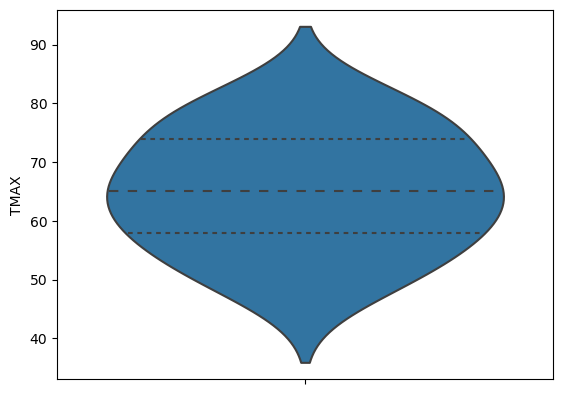

In [8]:
bday = dateutil.parser.parse('05/11/1999')
last_bday = dateutil.parser.parse('05/11/2019')
bday_range = pd.date_range(bday, last_bday, freq=pd.DateOffset(years=1))

bday_wx = df_wx.loc[bday_range]
sns.violinplot(data=bday_wx, y='TMAX', inner='quartile')

Using the same data, create a histogram using seaborn's `histplot` method.

<Axes: xlabel='TMAX', ylabel='Count'>

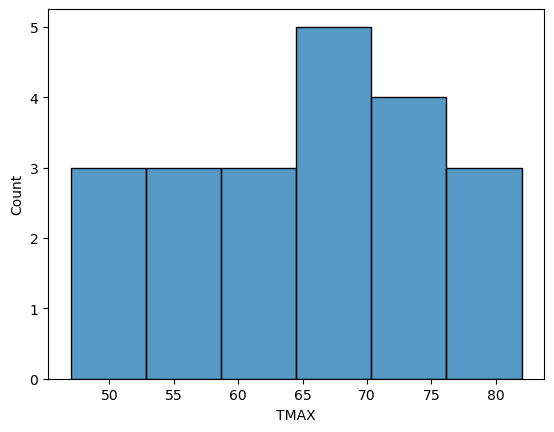

In [10]:
sns.histplot(data=bday_wx, x='TMAX')

## Find the decade maximum high and low temperature from 1950.  Plot both the maximum and minimum values as a single line plot.

<Axes: xlabel='DATE', ylabel='TMAX'>

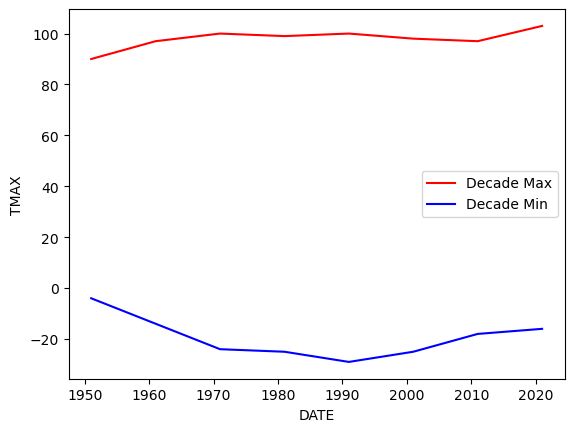

In [11]:
max_10yr = df_wx.loc['1950':].resample('10A')['TMAX'].max()
min_10yr = df_wx.loc['1950':].resample('10A')['TMIN'].min()

sns.lineplot(x=max_10yr.index, y=max_10yr, color='red', label='Decade Max')
sns.lineplot(x=min_10yr.index, y=min_10yr, color='blue', label='Decade Min')


## Boxplots of class day max temps

This class started on Jaunary 11, 2020 and runs for 16 weeks. It meets on Mondays and Wednesdays. Use boxplots to plot the historical distribution from 1960 onward of high temperatures for each date we meet this semester.  In other words, plot the range of maximum temperatures for each (month,day) value in the 2020 course calendar across all years from 1960 onward.


First find the date_range for the Mondays we meet in 2022 (including spring break).  Then `union` that with the date range for the Wendesdays of the semester.

In [12]:
class_2022_m = pd.date_range('1/10/2022', freq='W-MON', periods=16)
class_2022_w = pd.date_range('1/10/2022', freq='W-WED', periods=16)
class_2022 = class_2022_m.union(class_2022_w)
class_2022

DatetimeIndex(['2022-01-10', '2022-01-12', '2022-01-17', '2022-01-19',
               '2022-01-24', '2022-01-26', '2022-01-31', '2022-02-02',
               '2022-02-07', '2022-02-09', '2022-02-14', '2022-02-16',
               '2022-02-21', '2022-02-23', '2022-02-28', '2022-03-02',
               '2022-03-07', '2022-03-09', '2022-03-14', '2022-03-16',
               '2022-03-21', '2022-03-23', '2022-03-28', '2022-03-30',
               '2022-04-04', '2022-04-06', '2022-04-11', '2022-04-13',
               '2022-04-18', '2022-04-20', '2022-04-25', '2022-04-27'],
              dtype='datetime64[ns]', freq=None)

Make a copy of this union of date ranges.

You can then write a loop to find how many years to offset each entry in your semester index and repeat the unioning process to generate entries for each year from 1960 to 2019 in the copy you created.  In the end you should have an entry for each month/day we meet in 2022 but spanning over the years 1960 to 2019.

In [13]:
class_historic = pd.date_range(start='1/10/1960', end='1/10/1960', periods=1)
for year in range(1960,2019):
    offset = 2022-year
    new_dates = class_2022 - pd.DateOffset(years=offset)
    class_historic = class_historic.union(new_dates)
class_historic

DatetimeIndex(['1960-01-10', '1960-01-12', '1960-01-17', '1960-01-19',
               '1960-01-24', '1960-01-26', '1960-01-31', '1960-02-02',
               '1960-02-07', '1960-02-09',
               ...
               '2018-03-28', '2018-03-30', '2018-04-04', '2018-04-06',
               '2018-04-11', '2018-04-13', '2018-04-18', '2018-04-20',
               '2018-04-25', '2018-04-27'],
              dtype='datetime64[ns]', length=1888, freq=None)

Now that we have a list of dates, we can retrieve entries for each date from 1960 to 2019 on month/days that we meet.  However to plot this as a boxplot for each date over all years, we need to change our Index around.

We want to create what is called a MultiIndex.  `groupby` generated this for us in the past, but here we want to break our current Index of dates into a MultiIndex of three elments: the year, the month, and the day.

To create this new index, if df_class is the data frame that holds the values for each date over all years:
    pd.MultiIndex.from_arrays([df_class.index.year, df_class.index.month, df_class.index.day], names=['year', 'month', 'day'])

This will return a new index.  And you can use `set_index` on the data frame you are working on (e.g. df_class) to replace the index. 

Using `reset_index` on that dataframe will then flatten it to give each entry a full year, month, day index.  (In essence, it collapses the groupby behavior).  Use `inplace=True` here.  Call `reset_index` again (with `inplace=True`) to convert our DataFrame's index back to the default integer-based index.  So, if df_class is your dataframe:

    df_class.reset_index(inplace=True)   # Collapses our MultiIndex, flattening it
    df_class.reset_index(inplace=True)   # Converts the MultiIndex into columns; giving us the default integer Index


In [14]:
df_class = df_wx.loc[class_historic]
new_index = pd.MultiIndex.from_arrays(
    [df_class.index.year, df_class.index.month, df_class.index.day],
    names=['year', 'month', 'day']
)
df_class = df_class.set_index(new_index)
df_class.reset_index(inplace=True)
df_class

,year,month,day,TMIN,TMAX
0,1960,1,10,26.0,37.0
1,1960,1,12,27.0,52.0
2,1960,1,17,14.0,31.0
3,1960,1,19,22.0,31.0
4,1960,1,24,8.0,27.0
...,...,...,...,...,...
1883,2018,4,13,37.0,58.0
1884,2018,4,18,29.0,44.0
1885,2018,4,20,30.0,58.0
1886,2018,4,25,40.0,59.0


Now we can make the boxplot using Seaborn's boxplot function.  Assuming `df_class` is our DataFrame:

    sns.boxplot(data=df_class, x=df_class[['month','day']].apply(lambda x: f'{x[0]}/{x[1]}', axis=1), y='TMAX')
    plt.xticks(rotation=45);

This says that we should plot what is in `df_class`, that we want the x-axis values to be a string in the form of month/day and the y-values to be the maximum temperature.  We then want to rotate the x-tick labels 45 degrees.  The semicolon at the end of the second command suppresses output.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1/10'),
  Text(1, 0, '1/12'),
  Text(2, 0, '1/17'),
  Text(3, 0, '1/19'),
  Text(4, 0, '1/24'),
  Text(5, 0, '1/26'),
  Text(6, 0, '1/31'),
  Text(7, 0, '2/2'),
  Text(8, 0, '2/7'),
  Text(9, 0, '2/9'),
  Text(10, 0, '2/14'),
  Text(11, 0, '2/16'),
  Text(12, 0, '2/21'),
  Text(13, 0, '2/23'),
  Text(14, 0, '2/28'),
  Text(15, 0, '3/2'),
  Text(16, 0, '3/7'),
  Text(17, 0, '3/9'),
  Text(18, 0, '3/14'),
  Text(19, 0, '3/16'),
  Text(20, 0, '3/21'),
  Text(21, 0, '3/23'),
  Text(22, 0, '3/28'),
  Text(23, 0, '3/30'),
  Text(24, 0, '4/4'),
  Text(25, 0, '4/6'),
  Text(26, 0, '4/11'),
  Text(27, 0, '4/13'),
  Text(28, 0, '4/18'),
  Text(29, 0, '4/20'),
  Text(30, 0, '4/25'),
  Text(31, 0, '4/27')])

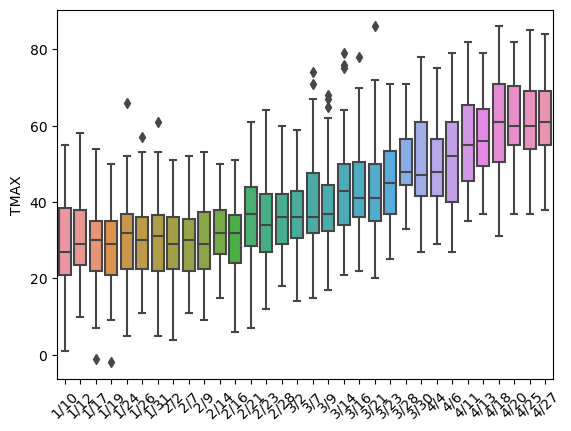

In [15]:
sns.boxplot(data=df_class,
    x=df_class[['month','day']].apply(lambda x: f'{x[0]}/{x[1]}', axis=1),
    y='TMAX')

plt.xticks(rotation=45)

 ## 90&deg; days
 
 The number of 90&deg;F days per year are often used to describe climate change.  Plot the average number of 90&deg;F days as a rolling average over 5 years across the entire data set. 

 Here we might want to use a list to store a tuple that contains the start year and the count of 90 degree days and a loop to iterate over the years 1960 to 2020-`window_size`, where `window_size` is 5.

 You may also need to use `numpy`'s `count_nonzero` to assist you with the counting.

 Once you have created your list of tuples, you can use `np.array` to convert it into a data structure that will allow slicing.  From there you can use seaborn's `lineplot` to plot your results.

Text(0, 0.5, 'Avg Days > 90')

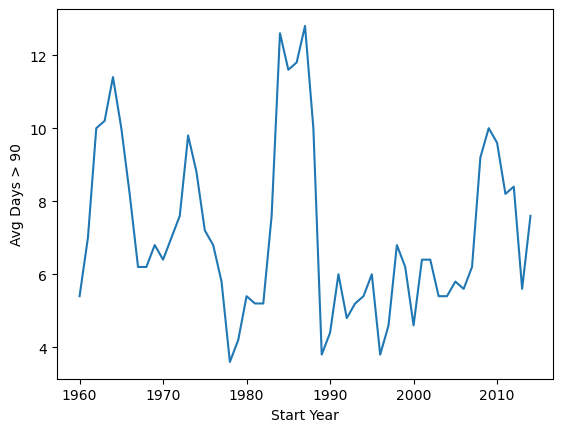

In [17]:
import numpy as np
deg_90 = []
window=5
for start_yr in range(1960,2020-window):
    end_yr = start_yr + window - 1
    yrs_range = pd.date_range(f'1/1/{start_yr}', f'12/13/{end_yr}')
    yrs_wx = df_wx.loc[yrs_range]
    count_90 = np.count_nonzero(yrs_wx['TMAX'] > 90)
    deg_90.append((start_yr, count_90))

data = np.array(deg_90)
sns.lineplot(x=data[:,0], y=data[:,1]/window)
plt.xlabel('Start Year')
plt.ylabel('Avg Days > 90')